# Intensity Projection and Threshold Determination

__Purpose:__ A notebook for determining the property z-stack projection and thresholding mechanisms for your immunofluorescent experiments from representative images

*Step 1:* Import necessary packages

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from skimage import io
from skimage import filters

*Step 2: User Inputs*

In [3]:
file_location = '../../qdbev_lectin.tif'

*Step 3: Importing Representative Images*

In [4]:
im = io.imread(file_location)

In [5]:
im.shape

(30, 512, 512)

In [6]:
cell_ims = im[0::2]
qd_ims = im[1::2]

In [7]:
cell_im = cell_ims[0]

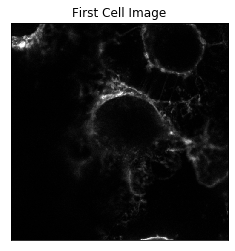

In [31]:
plt.imshow(cell_ims[5], cmap = 'gray')
plt.title('First Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

*Step 4: User segmentation and counting*

*Step 5: Z-stack projections*

*The QDBV cells don't have a z-stack so add code to by pass this step based on shape*

Common Methods: 

1. Max Intensity
2. Average
3. Minimum
4. Standard Deviation
5. Sum
6. Median

In [19]:
cell_im= cell_ims[5]

*Step 6: Getting a Histogram of the Image*

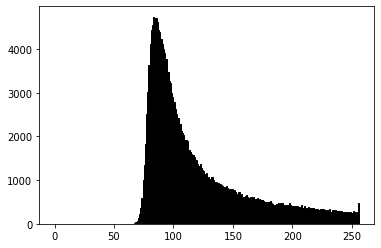

In [20]:
cell_hist = plt.hist(cell_im.ravel(), bins=256, range = (0, 256), fc='k', ec='k')

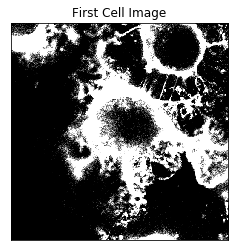

In [21]:
plt.imshow(cell_im, cmap = 'gray', clim=(125, 256))
plt.title('First Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

*Step 7: Image Thresholding*

Common Methods: 
1. Local
2. Global
    1. Histogram
    2. Clustering
    3. Entropy
    4. Object Attribute
    5. Spatial
    6. Local
3. Other
    1. Combination Thresholding
    2. Watershed

In [22]:
cell_im2 = np.clip(cell_im, 120, 256)

*Note: Interesting thing here that there is a point where only two single value peaks exist: this could be a thresholding automatic pattern for us*

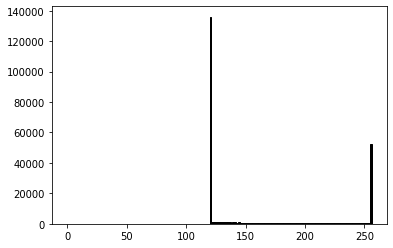

In [23]:
cell_hist = plt.hist(cell_im2.ravel(), bins=256, range = (0, 256), fc='k', ec='k')

In [24]:
gauss = filters.gaussian(cell_im2, sigma=1.5, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0)

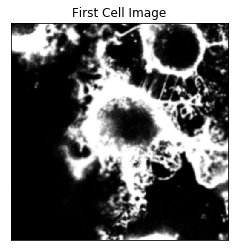

In [25]:
plt.imshow(gauss, cmap = 'gray')
plt.title('First Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


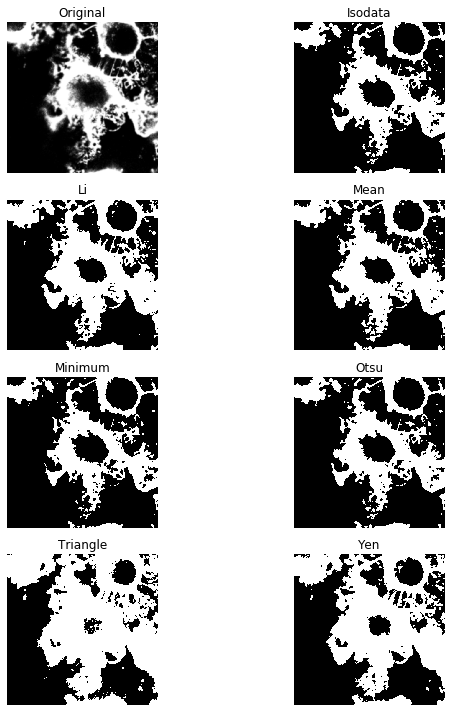

In [32]:
filter_test = filters.try_all_threshold(gauss, figsize=(10,10), verbose =True)

In [27]:
threshold = filters.threshold_otsu(gauss)
binary = gauss > threshold

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


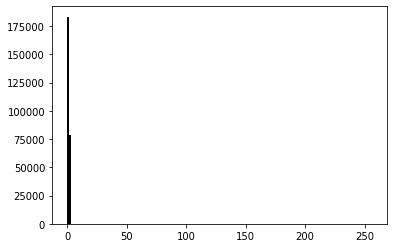

In [28]:
cell_hist2 = plt.hist(binary.ravel(), bins=256, range = (0, 256), fc='k', ec='k')

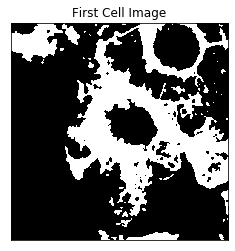

In [29]:
plt.imshow(binary, cmap = 'gray')
plt.title('First Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

NameError: name 'np' is not defined

*Step 8: Image Threshold Quantification*

*Step 9: Scoring [Project + Threshold] Methods*

*Step 10: Ranking Best Methods*